# 2.4.4 Working with Strings In Pandas

This mission will focus on using string cleaning tasks for multiple purposes like:
<br>
- Finding specific strings or substrings in columns
- Extracting substrings from unstructured data
- Removing strings or substrings from a series
<br>
<br>
This mission will use data from the 2015 World Happiness Report just like the previous missions, in combination with economic data from the World Bank. The later data set includes economic information about different countries, e.g. the currency and the income group based on the Gross National Income (GNI) per capita.


## Merging two data sets

In [92]:
# Reading the data set into pandas and combine them
import pandas as pd
happiness2015 = pd.read_csv('World_Happiness_2015.csv')
world_dev = pd.read_csv('World_dev.csv')
# Merging both dataframes together
merged = pd.merge(left=happiness2015, right=world_dev, how='left',
                 left_on=happiness2015['Country'], right_on=world_dev['ShortName'])
merged.head()

,key_0,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0


In [93]:
# Renaming one column in the newly merged dataframe
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}
merged = merged.rename(col_renaming, axis=1)
merged.head()

,key_0,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0


The first step of cleaning this data set is to remove the countries name at the beginning of a currency. For example, 'Danish krone' and 'Norwegian krone' should be renamed to just 'krone'. This can be accomplished by the string.split() method.

In [94]:
# Writing a function that returns the last word of a input using str.split()
def extract_last_word(element):
  return str(element).split()[-1]

extract_last_word("Working with Strings In Pandas")

'Pandas'

In [95]:
# Using the apply() method to apply the new function to the CurrencyUnit
# column
merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_word)
merged['Currency Apply'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Apply, dtype: object

## Using vectorized String methods

Instead of using the apply() method, using built-in vectorized methods can have a positive effect on performance. Using the split method as a vectorized string method would have looked like this:
<br><br>
Series.str.split()
<br><br>
One advantage of this approach is that each object does not have to be transformed into a string. In addition, multiple methods can be applied at once. 

In [96]:
merged['CurrencyUnit'].str.upper().str.split().head()

0        [SWISS, FRANC]
1      [ICELAND, KRONA]
2       [DANISH, KRONE]
3    [NORWEGIAN, KRONE]
4    [CANADIAN, DOLLAR]
Name: CurrencyUnit, dtype: object

In [97]:
# Splitting the Currency Unit into a list of words and selecting the 
# last word
print(merged['CurrencyUnit'].head())
merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(-1)
merged['Currency Vectorized'].head()

0        Swiss franc
1      Iceland krona
2       Danish krone
3    Norwegian krone
4    Canadian dollar
Name: CurrencyUnit, dtype: object


0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object

Using vectorized string methods makes the code easier to read and increases the performance.

## Exploring missing values with vectorized string methods

In [98]:
merged['CurrencyUnit'].isnull().sum()

13

Currently the CurrencyUnit column includes 13 data points that are missing values.

Let's create a function that returns the length of each data point in the CurrencyUnit table.

In [99]:
def compute_lengths(element):
    return len(str(element))

lengths_apply = merged['CurrencyUnit'].apply(compute_lengths)

In [100]:
# Checking the number of missing values in the result 
lengths_apply.value_counts(dropna=False)

14    21
4     20
12    17
13    14
3     13
15    13
16    12
18     9
17     9
11     8
22     7
25     5
19     3
9      2
26     1
20     1
23     1
10     1
39     1
Name: CurrencyUnit, dtype: int64

Suprisingly the output does not show the count of NaN values. Instead, it appears as if the compute_lengths function is treating NaN as Strings and returns a length of 3. In order to exclude missing values, the compute_lengths function has to be updated.

In [101]:
# Updaing the compute_lengths function
def compute_lengths(element):
    if pd.isnull(element):
        pass
    else:
        return len(str(element))

lengths_apply = merged['CurrencyUnit'].apply(compute_lengths)

In [102]:
# Generate the length of each element
lengths = merged['CurrencyUnit'].str.len()
# Counting the unique values in lengths
value_counts = lengths.value_counts(dropna=False)
value_counts

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
10.0     1
39.0     1
26.0     1
23.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

Now the null values are included when counting the unique values.

## Finding specific words in strings

The goal of the next excercise is to find word pattern in string columns.

In [103]:
# Finding the pattern of 'National accounts' / 'national accounts'
# in the SpecialNotes column
pattern = r"[Nn]ational accounts"
national_accounts = merged['SpecialNotes'].str.contains(pattern)
national_accounts.head()

0     NaN
1     NaN
2     NaN
3     NaN
4    True
Name: SpecialNotes, dtype: object

The new series national_accounts returns either True, False, or NaN.

In [104]:
national_accounts.value_counts(dropna=False)

NaN      65
True     54
False    39
Name: SpecialNotes, dtype: int64

Trying to return the rows containing the phrases 'national accounts' or 'National accounts' returns an error:

In [105]:
merged[national_accounts]

ValueError: cannot index with vector containing NA / NaN values

The reason for the error message are the NaN values. In order to get around this error, NaN values have to be converted to False values.

In [106]:
national_accounts.value_counts(dropna=False)

NaN      65
True     54
False    39
Name: SpecialNotes, dtype: int64

In [107]:
# Searching the column 'SpecialNotes' for patterns of characters 
national_accounts = merged['SpecialNotes'].str.contains(pattern,
    na=False)
# Indexing the dataframe based on the matches
merged_national_accounts = merged[national_accounts]
merged_national_accounts.head()

,key_0,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
4,Canada,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar
7,Sweden,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,...,2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0,krona,krona
8,New Zealand,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,...,2013,NaN,NaN,Yes,2012,2010.0,2013.0,2002.0,dollar,dollar
9,Australia,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,...,2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0,dollar,dollar
14,United States,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,...,2010,NaN,"Labor force survey (LFS), 2010",Yes,2012,2008.0,2013.0,2005.0,dollar,dollar


## Extracting substrings from a series

In [108]:
merged_national_accounts['SpecialNotes'].head(10)

4     Fiscal year end: March 31; reporting period fo...
7     Fiscal year end: June 30; reporting period for...
8     Fiscal year end: March 31; reporting period fo...
9     Fiscal year end: June 30; reporting period for...
14    Fiscal year end: September 30; reporting perio...
19    April 2013 database update: Based on data from...
23    Fiscal year end: March 31; reporting period fo...
31    In 2011, the Central Bank revised national acc...
33    Fiscal year end: September 30; reporting perio...
38    Fiscal year end: June 30; reporting period for...
Name: SpecialNotes, dtype: object

Next, the goal is to extract all the rows in 'SpecialNotes' where a year gets mentioned. 

In [109]:
# With regular expressions, the following syntax indicates a character
# could be a range of letters
pattern = r"[0-9]"
# Range of letters:
pattern1 = r"[a-z]"
# Restrictive substring starting with a number between 1-6 and ends 
# with 2 letters
pattern2 = r"[1-6][a-z][a-z]"
# In case the pattern repeats curly brackets can be used, indicating
# the number of times the expression repeats
pattern3 = r"[1-6][a-z]{2}"

In [110]:
# Creating a regular expression that will match years
pattern4 = r"([1-2][0-9]{3})"

In [111]:
# Using pattern4 and the str.extract() method to extract years from
# the 'SpecialNotes' column.
years = merged['SpecialNotes'].str.extract(pattern4)
years.head(10)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,1999
6,1999
7,NaN
8,NaN
9,1990


The parantheses in the regular expression of pattern4 indicate that only the matching patterns' characters should be returned (in this case the year). This is called capturing group. Instead of returning the results in a series like above, a dataframe can be returned. This can be achieved by setting the expand parameter to True.

In [112]:
years = merged['SpecialNotes'].str.extract(pattern4, expand=True)
years.head(10)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,1999
6,1999
7,NaN
8,NaN
9,1990


## Extracting all matches of a pattern from a series

In the code above, using the str.extract() method will only return the first matching result. In order to generate all matching results, the method str.extractall() can be used.

In [113]:
# Setting the Country column as an index to make results easier to 
# read
merged = merged.set_index('Country')

Using a named capturing group can help to refer to the group by a specialized name. 

In [114]:
# Named capturing group syntax: (?P<Column_Name>...)
pattern = r"(?P<Years>[1-2][0-9]{3})"
merged['SpecialNotes'].str.extractall(pattern).head(10)

Years
Country     match      
Finland     0      1999
            1      1999
Netherlands 0      1999
            1      2037
            2      1999
Australia   0      1990
            1      2008
Israel      0      2010
Austria     0      1999
            1      1999

In [115]:
# Using the code from above to extract all the years from the 
# IESurvey column
years = merged["IESurvey"].str.extractall(pattern)
years.head()

,,Years
Country,match,
Switzerland,0,2004
Iceland,0,2010
Denmark,0,2010
Norway,0,2010
Canada,0,2010


In [116]:
# Creating a list of the unique years and the corresponding value
# count
value_counts = years["Years"].value_counts()
print(value_counts)

2012    33
2010    28
2011    22
2013    12
2009     8
2008     6
2005     6
2007     4
2004     3
2003     1
1992     1
2000     1
1995     1
1999     1
1998     1
2002     1
2006     1
Name: Years, dtype: int64


## Extracting more than one group of patterns from a string

While using the extractall method above not all results have been shown due to the fact that some year information are in the following format: 2018/19. Due to the regular expression above, the result would have returned only 2018. 

In [117]:
# Generating a regular expression that would return 2018/19 as a 
# result.
pattern = r"(?P<First_Year>[1-2][0-9]{3})(/)?(?P<Second_Years>[0-9]{2})?"
years = merged['IESurvey'].str.extractall(pattern)
years.head(10)

,,First_Year,1,Second_Years
Country,match,,,
Switzerland,0,2004,NaN,NaN
Iceland,0,2010,NaN,NaN
Denmark,0,2010,NaN,NaN
Norway,0,2010,NaN,NaN
Canada,0,2010,NaN,NaN
Finland,0,2010,NaN,NaN
Netherlands,0,2010,NaN,NaN
Sweden,0,2005,NaN,NaN
Australia,0,2003,NaN,NaN


The two question marks after every group got added to indicate that the match for those groups is optional.

In [118]:
# Validating that years with the format yyyy/yy got extracted.
years.sort_values('Second_Years').head()

,,First_Year,1,Second_Years
Country,match,,,
Kenya,0,2005,/,06
Angola,0,2008,/,09
Mozambique,0,2008,/,09
Nigeria,0,2009,/,10
Mali,0,2009,/,10


In the next step, the Second_Years column will be reformated and the 1 column will be deleted.

In [119]:
# Removing the paranthesis form / so it does not get addad to the 
# new dataframe
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"
years = merged['IESurvey'].str.extractall(pattern)
# Extracting the first two numbers of First_Year using vectorized
# slicing
first_two_years = years['First_Year'].str[0:2]
# Adding first_two_years in front of second_year
years['Second_Year'] = first_two_years + years['Second_Year']
years.sort_values('Second_Year').head()

,,First_Year,Second_Year
Country,match,,
Kenya,0,2005,2006
Angola,0,2008,2009
Mozambique,0,2008,2009
Nigeria,0,2009,2010
Mali,0,2009,2010


## Challenge

In the first step, the values from the IncomeGroup have to be transformed to a standardized format.

In [120]:
merged['IncomeGroup'].head(20)

Country
Switzerland                High income: OECD
Iceland                    High income: OECD
Denmark                    High income: OECD
Norway                     High income: OECD
Canada                     High income: OECD
Finland                    High income: OECD
Netherlands                High income: OECD
Sweden                     High income: OECD
New Zealand                High income: OECD
Australia                  High income: OECD
Israel                     High income: OECD
Costa Rica               Upper middle income
Austria                    High income: OECD
Mexico                   Upper middle income
United States              High income: OECD
Brazil                   Upper middle income
Luxembourg                 High income: OECD
Ireland                    High income: OECD
Belgium                    High income: OECD
United Arab Emirates    High income: nonOECD
Name: IncomeGroup, dtype: object

In [126]:
# Updating the 'IncomeGroup' values into a more standardized form
merged['IncomeGroup'] = merged['IncomeGroup'].str.upper().str.replace(":","").str.replace('INCOME','')
merged['IncomeGroup'].head(20)

Country
Switzerland                HIGH  OECD
Iceland                    HIGH  OECD
Denmark                    HIGH  OECD
Norway                     HIGH  OECD
Canada                     HIGH  OECD
Finland                    HIGH  OECD
Netherlands                HIGH  OECD
Sweden                     HIGH  OECD
New Zealand                HIGH  OECD
Australia                  HIGH  OECD
Israel                     HIGH  OECD
Costa Rica              UPPER MIDDLE 
Austria                    HIGH  OECD
Mexico                  UPPER MIDDLE 
United States              HIGH  OECD
Brazil                  UPPER MIDDLE 
Luxembourg                 HIGH  OECD
Ireland                    HIGH  OECD
Belgium                    HIGH  OECD
United Arab Emirates    HIGH  NONOECD
Name: IncomeGroup, dtype: object

In [128]:
# Creating a pivot table to analyze the relationship between the 
# income group and the happiness score
pv_income = merged.pivot_table(index='IncomeGroup', values='Happiness Score')
pv_income

,Happiness Score
IncomeGroup,
HIGH NONOECD,6.250765
HIGH OECD,6.674000
LOW,3.925625
LOWER MIDDLE,4.927971
UPPER MIDDLE,5.426718


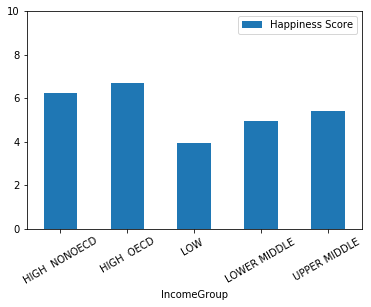

In [130]:
# Creating a bar plot for the pv_income dataframe
pv_income.plot(kind='bar',rot=30, ylim=(0,10))

## Conclusion

In this mission I learned about the benefits of vectorized string methods in combination with different methods that help to extract substrings from columns.